<a name='1'></a>
## 1 - Packages

Begin by importing all the packages you'll need during this assignment. 

- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.
- `dnn_app_utils` provides the functions implemented in the "Building your Deep Neural Network: Step by Step" assignment to this notebook.
- `np.random.seed(1)` is used to keep all the random function calls consistent. It helps grade your work - so please don't change it! 

In [10]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from keval_nn import *
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h3> 3.1 data loading </h3>

In [11]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


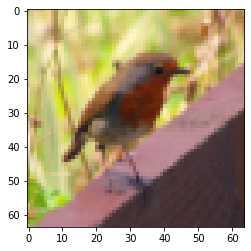

In [12]:
 #Example of a data
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [13]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


As usual, you reshape and standardize the images before feeding them to the network. The code is given in the cell below.

<img src="imvectorkiank.png" style="width:450px;height:300px;">
<caption><center><font color='purple'><b>Figure 1</b>: Image to vector conversion.</font></center></caption>

In [14]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T 
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.


print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


Now that you're familiar with the dataset, it's time to build a deep neural network to distinguish cat images from non-cat images!

You're going to build two different models:

- A 2-layer neural network
- An L-layer deep neural network

Then, you'll compare the performance of these models, and try out some different values for $L$. 

Let's look at the two architectures:

<img src="images/2layerNN_kiank.png" style="width:650px;height:400px;">
<caption><center><font color='purple'><b>Figure 2</b>: 2-layer neural network. <br> The model can be summarized as: INPUT -> LINEAR -> RELU -> LINEAR -> SIGMOID -> OUTPUT.</font></center></caption>

<u><b>Detailed Architecture of Figure 2</b></u>:
- The input is a (64,64,3) image which is flattened to a vector of size $(12288,1)$. 
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ of size $(n^{[1]}, 12288)$.
- Then, add a bias term and take its relu to get the following vector: $[a_0^{[1]}, a_1^{[1]},..., a_{n^{[1]}-1}^{[1]}]^T$.
- Repeat the same process.
- Multiply the resulting vector by $W^{[2]}$ and add the intercept (bias). 
- Finally, take the sigmoid of the result. If it's greater than 0.5, classify it as a cat.

<h1><font color='red'>Without regulization </font></h1>

# L-layer model ramdom initizlization

In [15]:
layers_dims = [12288, 20, 7, 5, 3,1]

In [16]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.01, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    costs = []  
    parameters = initialize_parameters_deep(layers_dims)
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %.4f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.7100
Cost after iteration 100: 0.6729
Cost after iteration 200: 0.6597
Cost after iteration 300: 0.6507
Cost after iteration 400: 0.6421
Cost after iteration 500: 0.6296
Cost after iteration 600: 0.6037
Cost after iteration 700: 0.5522
Cost after iteration 800: 0.4766
Cost after iteration 900: 0.4121
Cost after iteration 1000: 0.3688
Cost after iteration 1100: 0.3037
Cost after iteration 1200: 0.3162
Cost after iteration 1300: 0.2438
Cost after iteration 1400: 0.2123
Cost after iteration 1500: 0.1618
Cost after iteration 1600: 0.1466
Cost after iteration 1700: 0.1352
Cost after iteration 1800: 0.1266
Cost after iteration 1900: 0.1187
Cost after iteration 2000: 0.1118
Cost after iteration 2100: 0.1070
Cost after iteration 2200: 0.1013
Cost after iteration 2300: 0.0973
Cost after iteration 2400: 0.0934
Cost after iteration 2500: 0.0902
Cost after iteration 2600: 0.0872
Cost after iteration 2700: 0.0850
Cost after iteration 2800: 0.0827
Cost after iteration 2900:

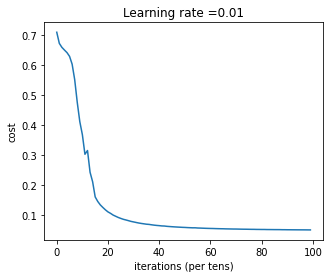

In [17]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 10000, print_cost = True)

In [18]:
pred_train = predict(train_x, train_y, parameters)

Accuracy:0.99 


In [19]:
pred_test = predict(test_x, test_y, parameters)

Accuracy:0.82 


<h1><font color='red'>With regulization </font></h1>

# L-layer model ramdom initizlization

In [24]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.01, num_iterations = 3500, print_cost=False,lambd=0.7):
    np.random.seed(1)
    costs = []  
    parameters = initialize_parameters_deep(layers_dims)
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        if lambd==0:
           cost = compute_cost(AL, Y)
        else:
            cost = compute_cost_with_regularization(AL, Y, parameters, lambd)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.769522
Cost after iteration 100: 0.732452
Cost after iteration 200: 0.719291
Cost after iteration 300: 0.710306
Cost after iteration 400: 0.701779
Cost after iteration 500: 0.689355
Cost after iteration 600: 0.663712
Cost after iteration 700: 0.612799
Cost after iteration 800: 0.537948
Cost after iteration 900: 0.474384
Cost after iteration 1000: 0.431990
Cost after iteration 1100: 0.367727
Cost after iteration 1200: 0.380947
Cost after iteration 1300: 0.309163
Cost after iteration 1400: 0.278064
Cost after iteration 1500: 0.227935
Cost after iteration 1600: 0.213056
Cost after iteration 1700: 0.201767
Cost after iteration 1800: 0.193392
Cost after iteration 1900: 0.185592
Cost after iteration 2000: 0.178858
Cost after iteration 2100: 0.174141
Cost after iteration 2200: 0.168589
Cost after iteration 2300: 0.164679
Cost after iteration 2400: 0.160792
Cost after iteration 2500: 0.157672
Cost after iteration 2600: 0.154769
Cost after iteration 2700: 0.152688
Cost

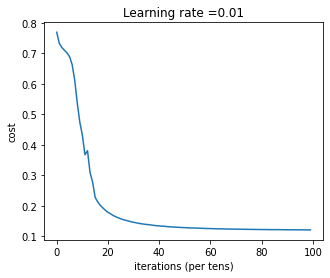

In [29]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 10000, print_cost = True)

In [32]:
pred_train = predict(train_x, train_y, parameters)

Accuracy:0.99 


In [33]:
pred_test = predict(test_x, test_y, parameters)


Accuracy:0.82 


# initlization with He initilization

Cost after iteration 0: 0.656799
Cost after iteration 100: 0.534923
Cost after iteration 200: 0.462916
Cost after iteration 300: 0.418905
Cost after iteration 400: 0.342062
Cost after iteration 500: 0.415153
Cost after iteration 600: 0.194941
Cost after iteration 700: 0.227941
Cost after iteration 800: 0.111866
Cost after iteration 900: 0.104573
Cost after iteration 1000: 0.079040
Cost after iteration 1100: 0.066495
Cost after iteration 1200: 0.052282
Cost after iteration 1300: 0.039806
Cost after iteration 1400: 0.030492
Cost after iteration 1500: 0.023694
Cost after iteration 1600: 0.019115
Cost after iteration 1700: 0.015533
Cost after iteration 1800: 0.012608
Cost after iteration 1900: 0.010181
Cost after iteration 2000: 0.008731
Cost after iteration 2100: 0.007806
Cost after iteration 2200: 0.007043
Cost after iteration 2300: 0.006437
Cost after iteration 2400: 0.005962
Cost after iteration 2500: 0.005566
Cost after iteration 2600: 0.005210
Cost after iteration 2700: 0.004939
Cost

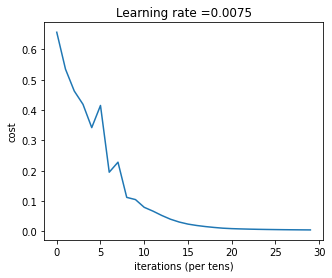

In [60]:
parameters_he = L_layer_model_he(train_x, train_y, layers_dims, num_iterations = 3000, print_cost = True)